(ch1:whatis)=
# What is network machine learning?

When you first hear the term "network machine learning", you really might not know what to expect. We think that if you are reading this book, you probably have some idea what the term "machine learning" means. According to [wikipedia](https://en.wikipedia.org/wiki/Machine_learning), machine learning is a field of inquiry devoted to understanding and building methods that *learn*; that is, methods that leverage data to improve performance on some set of tasks. If you aren't too familiar with what this entails, we would recommend you start by reading an introductory work on machine learning, such as [Hands on machine learning](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646/ref=sr_1_1?keywords=hands+on+machine+learning+with+python&link_code=qs&qid=1652135106&sr=8-1), by Aurélien Géron.

For instance, if you have an image and you are a photograph editor working in pattern recognition, you might want to learn how you can automatically segment a person so that you can blur the background, which we show at a high level in {numref}`ml-ex`. If you are doing natural language processing, you might want to learn how to take an audio track and identify the unique instruments in the song. If you are a scientist, you might want to learn how a lobster's size correlates with its age so that you can predict the average age of lobsters in the ocean. At an extremely high level, in all of these examples you are taking some data, and you want to learn something so that you can accomplish some sort of a task. Machine learning has grown enormously over the past few decades, and the use-cases of machine learning are rapidly pervading modern life.

```{figure} Images/cboy.png
---
align: center
name: ml-ex
---
Learning how to segment an image to blur the background. A machine learning system is trained using numerous images with the foreground segmented out. This trained system is then used to segment out the foreground on new images, and then the background is blurred.
```

## Traditional machine learning leverages tabular data structures

In traditional machine learning, data follows what is called a *tabular* format. What this means is that the data can be arranged easily in a table or an array, where each row represents a single observation. If you are unfamiliar with the term tabular data, we recommend you check out the [Pandas tutorial on tabular data](https://pandas.pydata.org/docs/getting_started/intro_tutorials/01_table_oriented.html). 

Somewhat conveniently, an extremely large portion of modern developments in machine learning apply directly to tabular data. This means that, with some amount of effort, one can take techniques developed in one domain of machine learning, and readily modify or apply them to problems in another domain of machine learning, without needing to *reinvent the wheel*. What we mean by this is that you can focus your effort on your problem, and borrow techniques developed for related problems, without having to start from scratch every time. For example, if you had a tabular dataset where each row represented a lobster and each column represented the length and sex of the lobster, you might try to learn how these columns can be used to predict the lobster's claw size. You could do this using an extremely general approach, by simply producing a line of best fit for the claw size depending on which biological sex a lobster is. In the {numref}`tabular-dat`, we take a look at how tabular data fits into a machine learning system.

```{figure} Images/ml_ex.png
---
align: center
name: tabular-dat
---
Machine learning systems start by obtaining inputs as tabular data, where the rows are observations and the columns are features or dimensions of each observation. In this example, we see a basic classification task, in which each observation is either blue or orange. Some of the data (the *training set*, circles) is used to train a machine learning algorithm (*learning*, the transparent blue and orange voronoi cells), and then the remainder of the data is used to test the trained algorithm on new data (*evaluating* on the squares using the voronoi cells learned). The trained model can then be further refined (*updated*), or deployed for your intended use-case.
```

## What is a network?

So, what does this have to do with networks? As it turns out in the 21st century, networks are all around us. When most people think of a "network", they often have some vague image in their head of the internet, or of cell phone towers transmitting data, or of some other technical thing. But networks have a specific definition in the world of machine learning and data science. The most direct example can easily be explained through the recent rise in social media over the last decade. In a network, your data follows a prescribed pattern: you have a group of items (say, people who are on the social network) who are interconnected to one another through clearly defined relationships (say, studying which people are friends with one another in the network). 

In other places, you might hear networks referred to as "graphs", and the field studying them as "graph theory". We try to avoid that word in this book, since it's easy to confuse a graph and a plot with an x/y coordinate axis. We'll stick to the term "network" throughout this book when possible. There might be times when we choose to use the word "graph", since the name of some algorithm or tool we're showing you uses it, but just remember that they mean the same thing.

Let's get a little bit more specific about what we mean. Each object in your network is called a node, or a vertex (we'll stick to node in this book, just for consistency's sake). A connection between two nodes is called an edge. Below you can see a visualization of a simple network with 8 nodes. As you can see, some nodes are well-connected with other nodes -- for example, the node in the center, with edges to five other nodes -- and you can also have nodes which aren't connected to anything, like the lonely extra node without any edges.

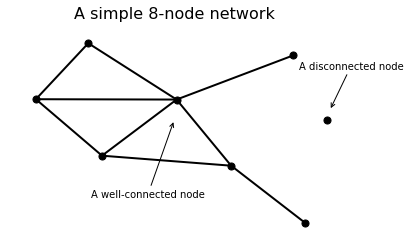

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
g = nx.Graph()
n_nodes = 8
g.add_nodes_from(range(n_nodes))
g.add_edges_from([(0, 1), (1, 2), (1, 4), (2, 3), 
                  (2, 4), (3, 4), (3, 5), (4, 5), 
                  (4, 6)])
nx.relabel_nodes(g, {i: i+1 for i in g.nodes}, copy=False)

nx.draw_kamada_kawai(g, node_color='black', node_size=50, width=2, ax=ax)
ax.set_title("A simple 8-node network", fontsize=16);

ax.annotate("A well-connected node", xy=(-.1, 0), xytext=(-.5, -.75), arrowprops=dict(arrowstyle="->"))
ax.annotate("A disconnected node", xy=(.65, .1), xytext=(.5, .5), arrowprops=dict(arrowstyle="->"));

Networks might also come attached with extra information. Each node might have a set of features attached to it: extra information that comes in the form of a table. Say the network we just made is of business transactions. Assume that there are eight companies, one for each node, and there is an edge if one company has sold something to another.

Then, we might also have information about the company size. If the company is larger, you might assume that it'll tend to have had more business transactions with the other companies. The network, in this case, includes the company size information.

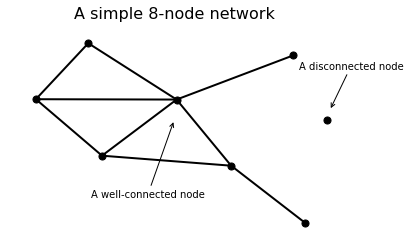

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
g = nx.Graph()
n_nodes = 8
g.add_nodes_from(range(n_nodes))
g.add_edges_from([(0, 1), (1, 2), (1, 4), (2, 3), 
                  (2, 4), (3, 4), (3, 5), (4, 5), 
                  (4, 6)])
nx.relabel_nodes(g, {i: i+1 for i in g.nodes}, copy=False)

nx.draw_kamada_kawai(g, node_color='black', node_size=50, width=2, ax=ax)
ax.set_title("A simple 8-node network", fontsize=16);

ax.annotate("A well-connected node", xy=(-.1, 0), xytext=(-.5, -.75), arrowprops=dict(arrowstyle="->"))
ax.annotate("A disconnected node", xy=(.65, .1), xytext=(.5, .5), arrowprops=dict(arrowstyle="->"));

### Why do we need special machine learning approaches for networks?

As you will learn throughout this book, the problem you run into is that networks are not, in their most naive form, tabular data, but network-valued data. This means that, unfortunately, all of those techniques that were developed over decades for tabular data cannot, natively, be used for network-valued data. However, as we will see, we can take various approaches to *adapt* networks to a more traditional format, including tabular structures using network representations. Once we take these networks and adapt them to more traditional structures, we can then apply techniques from other domains of machine learning to learn about our networks. In {numref}`nml-high-level`, we see how network machine learning functions at a high level.


```{figure} Images/nml-high-level.png
---
align: center
name: nml-high-level
---
In network machine learning, we start by obtaining a network. The first step in network machine learning is to select a suitable representation for the network, which depends on the type of questions you have. Using this representation, you apply a machine learning system which is suited appropriately for the type of task that you have. As the set of questions one might have about network data may differ from a typical tabular dataset, the manner in which these techniques are applied may need to be tuned for the question of interest.
```

### A loose definition of network machine learning, and your path ahead

Now that we have some basic background about networks, we are ready to put together an extremely unrefined definition of network machine learning. Loosely, **network machine learning** is machine learning for network-valued data (data which is a *network*, not a *tabular structure*). 

Thus, before we set out to learn about network machine learning itself, we have some ground to cover. We'll take a look at the different types of problems you might come across in network machine learning, and how network data fits into the types of problems you want to answer. Then, we'll see how a particular branch of mathematics, called *statistics*, fits into the machine learning landscape. This chapter will be very high level, but will give you some motivation for how the pieces of the book will fit together in the grand scheme of things. We'll introduce some figures that put together a setting for each piece of the book, and rotate back to these figures once we have some better context repeatedly to organize the procedure of network machine learning for you.

Along the way, we'll try to answer some basic questions. How do networks fit into the world of machine learning, for example, and why are they important? What does it mean to learn from a network, and what kinds of things would you be trying to learn? How can we use network-valued data to understand the world better? Having a good understanding of the high level will help you see how the lower level parts fit together towards your ultimate goal of applying network machine learning to new and exciting problems in your work!

Let's get started!